# 例5.9、1962-1991年德國工人季度失業率序列建模
## data1.16.csv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.tsa.arima.model as smt2
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

## statsmodels自帶的畫ACF的函數

In [3]:
def drawts(y,pname):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=None,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=None,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()## statsmodels自帶的LB test## statsmodels自帶的畫ACF的函數

## statsmodels自帶的LB test

In [4]:
def purerandtest(y):
    a,b=lb_test(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## Green函數

In [5]:
def getgi(phi,theta,n=20):
    ## calculate G:  phi=phi,    theta=theta
    ## calculate I:  phi=theta,  theta=phi
    gi=np.zeros((n))
    gi[0]=1
    for j in range(1,n):
        gvalue=0
        for k in range(1,j+1):
            if k>len(phi)-1:
                phik=0
            else:
                phik=phi[k]
            gvalue=gvalue+phik*gi[j-k]
        if j>len(theta)-1:
            thetai=0
        else:
            thetai=theta[j]
        gi[j]=gvalue-thetai
    return gi

## 開始分析

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


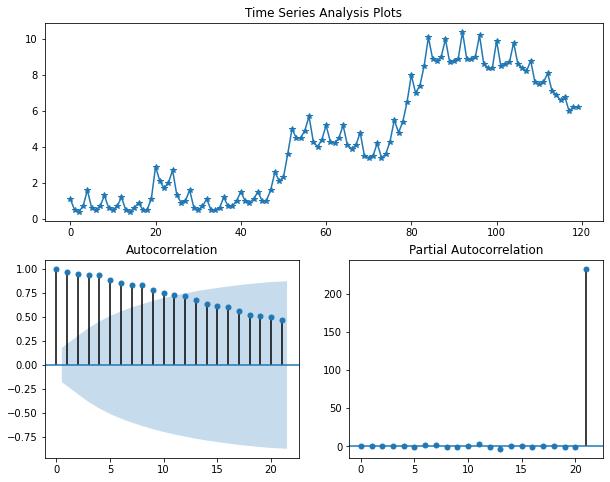

In [6]:
##read data
dfname='data1.16'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
drawts(y,dfname)

## 4步&1階差分

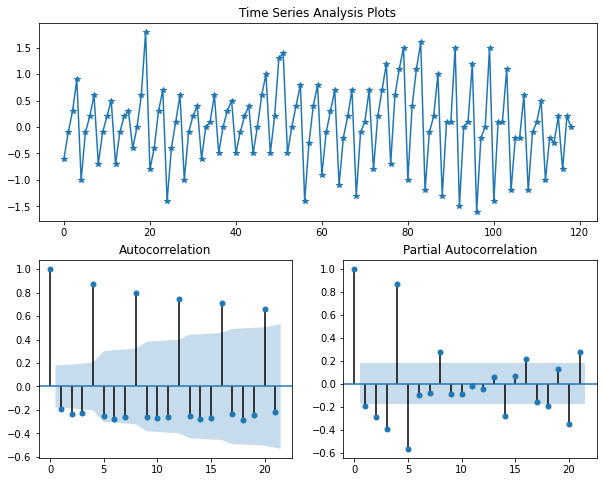

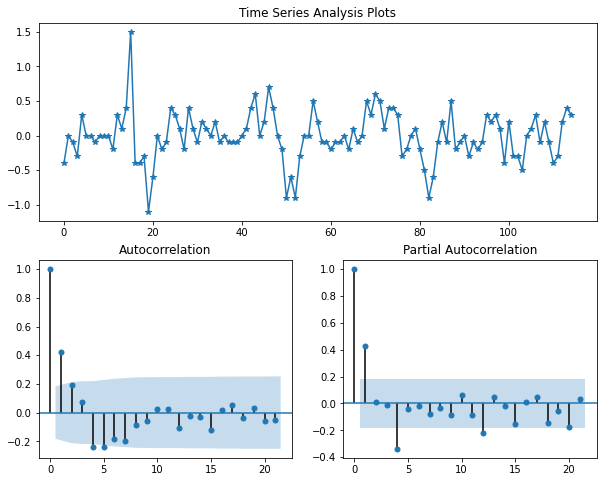

In [7]:
yd=y[1:]-y[:-1]
drawts(yd,dfname)
yd=yd[4:]-yd[:-4]
drawts(yd,dfname)

## 白噪聲檢驗

In [8]:
purerandtest(yd)

----time series: LB pure randomness test----
            LB        Pvalue  lags
0    21.025198  4.532824e-06     1
1    25.277483  3.243877e-06     2
2    25.908667  9.966711e-06     3
3    32.823599  1.298045e-06     4
4    39.798456  1.639840e-07     5
5    43.836896  7.963525e-08     6
6    48.570894  2.753296e-08     7
7    49.563635  4.956657e-08     8
8    50.016608  1.069520e-07     9
9    50.077377  2.583038e-07    10
10   50.138706  5.910034e-07    11
11   51.708491  6.982144e-07    12
12   51.763299  1.481184e-06    13
13   51.862228  2.967096e-06    14
14   53.809801  2.826212e-06    15
15   53.849689  5.486996e-06    16
16   54.285407  8.919009e-06    17
17   54.475723  1.546782e-05    18
18   54.632330  2.645655e-05    19
19   55.088904  3.982394e-05    20
20   55.428808  6.120182e-05    21
21   55.436925  1.029219e-04    22
22   57.384491  9.041223e-05    23
23   59.442304  7.654048e-05    24
24   59.717407  1.143499e-04    25
25   60.335221  1.511436e-04    26
26   60.82

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:494: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## ARIMA(p,d,q)建模參數估計

In [20]:
##ARIMA
arma10=smt2.ARIMA(y,order=((1,4),1,0),seasonal_order=(0,1,0,4),trend='n').fit() #trend=n,c,t,ct
print('----fitting summary----')
print(arma10.summary())

----fitting summary----
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  120
Model:             ARIMA([1, 4], 1, 0)x(0, 1, 0, 4)   Log Likelihood                 -26.697
Date:                              Sun, 14 Nov 2021   AIC                             59.394
Time:                                      15:07:53   BIC                             67.629
Sample:                                           0   HQIC                            62.736
                                              - 120                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4448      0.051      8.680      0.000       0.344       0

## 殘差白噪聲檢驗/模型顯著性檢驗

In [10]:
resid=arma10.resid
print('\n----residual pure randomness test')
purerandtest(resid)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:494: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)



----residual pure randomness test
----time series: LB pure randomness test----
           LB    Pvalue  lags
0    0.987334  0.320395     1
1    1.053960  0.590385     2
2    2.613860  0.455065     3
3    2.666273  0.615129     4
4    3.591030  0.609661     5
5    3.877853  0.693202     6
6    4.732219  0.692604     7
7    6.891459  0.548388     8
8    7.308656  0.605018     9
9    7.324537  0.694492    10
10   7.327674  0.771961    11
11  12.889297  0.377138    12
12  13.218434  0.431084    13
13  13.324025  0.501183    14
14  14.786675  0.466890    15
15  14.795534  0.539662    16
16  16.816520  0.466863    17
17  19.764072  0.346258    18
18  19.764207  0.408890    19
19  20.154632  0.448295    20
20  22.024243  0.398114    21
21  22.103933  0.453700    22
22  22.310662  0.501569    23
23  24.787058  0.417405    24
24  24.787507  0.474332    25
25  24.816945  0.529355    26
26  25.591176  0.541368    27
27  26.259879  0.558762    28
28  26.328639  0.607878    29
29  26.474277  0.650

## 擬合

In [11]:
myalpha=0.05
mypred=arma10.get_prediction(start=0,end=len(y)-1+20,dynamic=False)  ##if True, start >0
print('\n----fitted confidence interval: %d %%'%((1-myalpha)*100))
print(mypred.summary_frame(alpha=myalpha))

#mypred.predicted_mean
#mypred.se_mean


----fitted confidence interval: 95 %
y        mean      mean_se  mean_ci_lower  mean_ci_upper
0    0.000000  1414.213608   -2771.807738    2771.807738
1    1.100000  1000.000065   -1958.864111    1961.064112
2    0.500000  1000.000065   -1959.464112    1960.464111
3    0.400000  1000.000065   -1959.564112    1960.364111
4    1.250000   707.106869   -1384.653996    1387.153996
..        ...          ...            ...            ...
135  4.491760     4.305906      -3.947661      12.931181
136  4.827584     4.678496      -4.342100      13.997267
137  4.033342     5.054717      -5.873721      13.940404
138  4.150944     5.415387      -6.463019      14.764906
139  4.058756     5.757209      -7.225166      15.342678

[140 rows x 4 columns]


## 畫圖

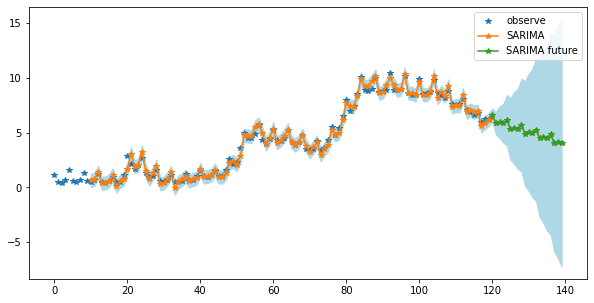

In [21]:
startdraw=10
plt.figure(figsize=(10,5))
plt.plot(y,'*',label='observe')
plt.plot(np.arange(startdraw,mypred.predicted_mean.shape[0]),mypred.predicted_mean[startdraw:],'-*',label='SARIMA')
plt.plot(np.arange(len(y),mypred.predicted_mean.shape[0]),mypred.predicted_mean[len(y):],'-*',label='SARIMA future')

plt.fill_between(np.arange(startdraw,mypred.predicted_mean.shape[0]),
                 mypred.conf_int(0.05)[startdraw:,0],
                 mypred.conf_int(0.05)[startdraw:,1],
                 color='lightblue')
plt.legend()
plt.show()